In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
%matplotlib inline

# Predicting the Sale Price of Bulldozers using Machine Learning

## Problem Definition 
> how well can we predict the future sale prices of a bulldozer, given its characteristics and previos examples of much similar bulldozers have been sold for?
## Data 
The data is downlaoded from the kaggle blubook for bulldozers competition.

The data for this competition is split into three parts:
* 
Train.csv is the training set, which contains data through the end of 2011* .
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboar* d.
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competit
ion.
## Evalua
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
ion 
## Feat
All the features of the data and their information is available in "data/bluebook-for-bulldozers/Data Dictionary.xlsx"ures

In [2]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", 
                low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

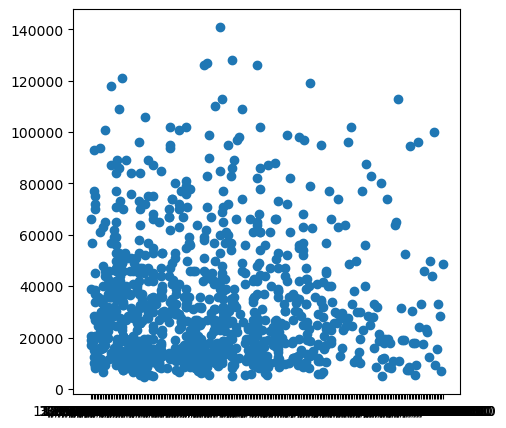

In [6]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(df.saledate[:1000], df.SalePrice[:1000]);

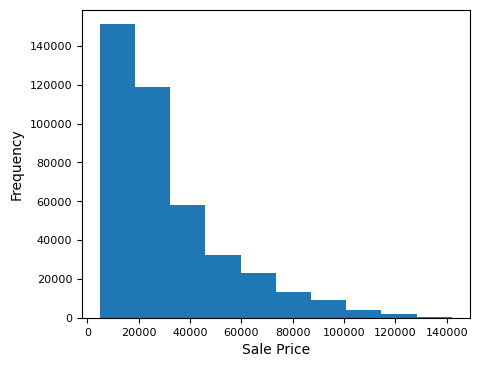

In [7]:
df.SalePrice.plot(kind = "hist", figsize = (5,4), fontsize = 8)
plt.xlabel("Sale Price");

### Parsing dates 
When we work with time series data, we want to enrich the time and date components as much as possible. 

We can do that by telling pandas which of our columns has dates in it using the "parse.dates" parameter.

In [8]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", 
           low_memory=False, parse_dates=["saledate"])

In [9]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

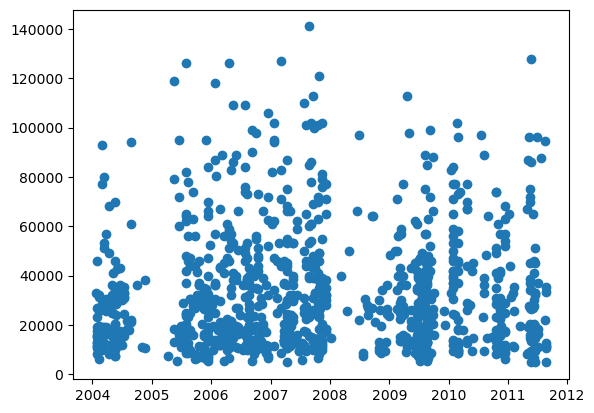

In [10]:
fig, ax = plt.subplots()
ax = plt.scatter(df.saledate[:1000], df.SalePrice[:1000]);

### sort DataFrame by saledate 

When working with timesereies data, it is a good idea to sort it by date.

In [11]:
# Sort DataFrame in date order 
df.sort_values(by = ["saledate"], inplace=True, ascending=True)
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [12]:
# Make copy of original df 
df_org = df.copy() 
df_org.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

## Add datetime parameters for saledate columnm

In [13]:
df["saleYear"] = df.saledate.dt.year
df["saleMonth"] = df.saledate.dt.month 
df["saleDay"] = df.saledate.dt.day
df["saleDayOfWeek"] = df.saledate.dt.dayofweek
df["saleDayOfYear"] = df.saledate.dt.dayofyear

In [14]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [15]:
# Now there is no need of saleDate column 
df.drop(columns=["saledate"], inplace=True)

## 5. Modelling 
Let's do some model-driven EDA 

### Covert string to categories 
One way we can convert all our data into numbers is by converting it into pandas categories

In [16]:
# checking if columns have string as data type 
for label, content in df.items(): 
    if content.dtype == "object": 
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [17]:
# This will turn all objects into category values  
for label, content in df.items(): 
    if content.dtype == "object": 
        df[label] = content.astype("category").cat.as_ordered()

In [18]:
df.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [19]:
df.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### Lets deal with missing values now

In [20]:
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### lets save our preprocessed data frame

In [21]:
df.to_csv("data/bluebook-for-bulldozers/train_preprocessed.csv", 
          index=False)

### Fill Missing values 

#### Filling numerical missing values first

In [22]:
# checking which labels have numerical data and misisng values
for label, content in df.items():
    if (pd.api.types.is_numeric_dtype(content) 
        and content.isna().sum() > 0): 
        print(label)

auctioneerID
MachineHoursCurrentMeter


In [23]:
# Filling missing values with median 
for label, content in df.items():
    if (pd.api.types.is_numeric_dtype(content) 
        and content.isna().sum() > 0): 
        # creating a column to check if the missing value is replaced by median or not
        df[label + "_missing"] = content.isna()
        df[label] = content.fillna(content.median())

In [24]:
df.auctioneerID.isna().sum(), df.MachineHoursCurrentMeter.isna().sum()

(0, 0)

In [25]:
# lets now fill the missing values in non numeric column  
for label, content in df.items(): 
    if not pd.api.types.is_numeric_dtype(content):
        # creating a column to check if missing value is replaced 
        df[label + "_missing"] = content.isna()
        df[label] = pd.Categorical(content).codes + 1

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


In [27]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_missing,False,True,False,True,False
Blade_Type_missing,False,True,False,True,False
Travel_Controls_missing,False,True,False,True,False
Differential_Type_missing,True,False,True,False,True


In [28]:
df.isna().sum()

SalesID                      0
SalePrice                    0
MachineID                    0
ModelID                      0
datasource                   0
                            ..
Backhoe_Mounting_missing     0
Blade_Type_missing           0
Travel_Controls_missing      0
Differential_Type_missing    0
Steering_Controls_missing    0
Length: 103, dtype: int64

## Bulid Machine learning Model 

Now we have all the data in numerical values and all the missing values are handled.
We are ready to build a machine learning model

In [29]:
%%time
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor(n_jobs= -1, random_state=42)

model.fit(df.drop(columns=["SalePrice"]), df.SalePrice)

CPU times: total: 55min 31s
Wall time: 17min 15s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [38]:
model.score(df.drop(columns=["SalePrice"])[:100], df.SalePrice[:100])

0.9928903444575617

### splitting data into train/validation sets 

In [40]:
df_val = df[df.saleYear == 2012]
df_train = df[df.saleYear != 2012]

In [41]:
# Split data into X & y 
X_train, y_train = df_train.drop(columns=["SalePrice"]), df_train.SalePrice
X_valid, y_valid = df_val.drop(columns = ["SalePrice"]), df_val.SalePrice
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [85]:
### Building evaluation function 
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
def rmsle(y_test, y_preds): 
    """
    Takes y_test and y_preds data set as argument
    and returns RMSLE evaluation metric as output
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds)) 

# Create function to evaluate model on a few different levels 
def show_scores(model, X_train = X_train, X_valid = X_valid, y_train = y_train, y_valid = y_valid):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE" : mean_absolute_error(y_train, train_preds), 
              "valid MAE" : mean_absolute_error(y_valid, val_preds), 
              "Training RMSLE" : rmsle(y_train, train_preds), 
              "Valid RMSLE" : rmsle(y_valid, val_preds), 
              "Training R^2" : r2_score(y_train, train_preds), 
              "Valid R^2" : r2_score(y_valid, val_preds)}
    return scores

### Testing our model on a subset (to tune the hyperparameters)

In [44]:
%%time
reg = RandomForestRegressor(n_jobs=-1, random_state=42, 
                           max_samples=10000)

reg.fit(X_train, y_train)

CPU times: total: 2min 33s
Wall time: 42.7 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [49]:
show_scores(reg)

{'Training MAE': 5561.2988092240585,
 'valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

In [53]:
%%time
### Hyperparameter tuning with RandomizedSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

rf_grid = {"n_estimators" : np.arange(10, 100, 10), 
           "max_depth" : [None, 3, 5, 10], 
           "min_samples_split" : np.arange(2, 20, 2), 
           "min_samples_leaf" : np.arange(1, 20, 2),
           "max_features" : [0.5, 1, "sqrt"], 
           "max_samples" : [10000]} 

# Instantiate RandomizedSearchCV model 
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, 
                                random_state=42),
                             param_distributions=rf_grid, 
                             n_iter=2, 
                             cv = 5, 
                             verbose= True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 41.7 s
Wall time: 1min 21s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [56]:
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 10,
 'min_samples_leaf': 17,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': 10}

In [57]:
%%time
### Train a model with the best hyperparameters 

ideal_model = RandomForestRegressor(n_estimators=40, 
                                   min_samples_leaf=1, 
                                   min_samples_split=14, 
                                   n_jobs = -1, 
                                   max_samples=None,
                                   random_state=42)

ideal_model.fit(X_train, y_train)

CPU times: total: 17min 16s
Wall time: 4min 53s


RandomForestRegressor(min_samples_split=14, n_estimators=40, n_jobs=-1,
                      random_state=42)

In [58]:
show_scores(ideal_model)

{'Training MAE': 2833.92204414208,
 'valid MAE': 6129.510325249739,
 'Training RMSLE': 0.13991470474587536,
 'Valid RMSLE': 0.2534308316476846,
 'Training R^2': 0.9611787747625908,
 'Valid R^2': 0.8719727963465266}

## Make prediction on test data

In [87]:
# import the test data 
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv", parse_dates=["saledate"])

### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [88]:
def preprocess_data(df):
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month 
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    df.drop(columns = ["saledate"], inplace=True)
    
    # fill numeric row with data
    for label, content in df.items():
        if (pd.api.types.is_numeric_dtype(content) 
            and content.isna().sum() > 0) or label == "auctioneerID": 
            # creating a column to check if the missing value is replaced by median or not
            df[label + "_missing"] = content.isna()
            df[label] = content.fillna(content.median())
            
        #filling categorical data and replace it with numbers
        if not pd.api.types.is_numeric_dtype(content):
            # creating a column to check if missing value is replaced 
            df[label + "_missing"] = content.isna()
            df[label] = pd.Categorical(content).codes + 1 

    return df

In [89]:
preprocess_data(df_test)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_missing,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [90]:
df_train.shape, df_test.shape

((401125, 103), (12457, 102))

In [91]:
test_preds = ideal_model.predict(df_test)

In [92]:
test_preds

array([20754.76988177, 21772.26776307, 48613.99631191, ...,
       11469.05164495, 17715.01525978, 31580.80031509])

In [93]:
# formatting in predictions 
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test.SalesID
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,20754.769882
1,1227844,21772.267763
2,1227847,48613.996312
3,1227848,83576.467660
4,1227863,61046.012549
...,...,...
12452,6643171,52202.913059
12453,6643173,11094.141902
12454,6643184,11469.051645
12455,6643186,17715.015260


In [94]:
# Export Predictions data 
df_preds.to_csv("data/bluebook-for-bulldozers/predictions.csv", 
               index=False)

## Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable** (SalePrice).

In [116]:
ideal_model.feature_importances_

array([4.69785320e-02, 1.21700746e-02, 3.27165814e-02, 1.96400789e-04,
       3.12452984e-03, 2.70521507e-01, 2.50550378e-03, 8.51336841e-04,
       2.00246735e-02, 8.10833897e-02, 5.27754379e-02, 4.26358209e-03,
       3.48494964e-03, 2.36009866e-01, 4.00170359e-02, 6.16456552e-03,
       2.09982027e-04, 2.03227825e-04, 1.75053184e-03, 8.27105540e-03,
       3.08092823e-04, 3.06200334e-05, 4.61499965e-04, 1.54624960e-04,
       1.59810802e-03, 2.33545512e-05, 4.22956953e-04, 6.14420333e-03,
       1.27952044e-04, 3.99672308e-05, 2.96828968e-03, 2.36685313e-03,
       2.08661899e-03, 4.00378489e-03, 1.81406501e-04, 1.44917433e-03,
       7.03682781e-04, 1.79066266e-02, 1.09996813e-05, 3.18809904e-06,
       1.65910644e-04, 8.66855984e-04, 9.92006769e-04, 5.61668663e-04,
       1.71002993e-04, 3.42983414e-04, 2.62629523e-04, 1.47914307e-03,
       7.82589173e-04, 1.28675856e-04, 1.84683940e-04, 7.77261296e-02,
       1.75913695e-03, 5.89900476e-03, 2.79066722e-03, 1.20320525e-02,
      

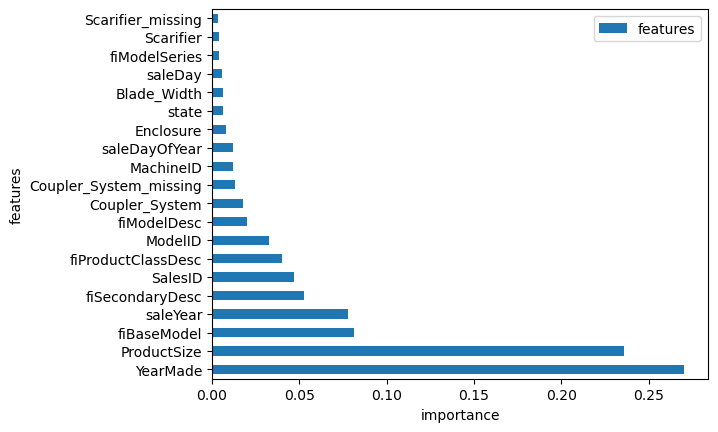

In [122]:
imp_features = ideal_model.feature_importances_
feature_df = pd.DataFrame({"features" : imp_features}, index=X_train.columns)
feature_df.sort_values("features", ascending = False, inplace = True)
feature_df[:20].plot(kind ="barh");
plt.xlabel("importance")
plt.ylabel("features");